In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sys
%matplotlib inline


In [10]:
# colums 인덱스 정의
data_columns = ['스케쥴 id','터미널 코드','Call Year','선박 코드','Call No','접안 일시','출발 일시','선적 작업 수량','양하 작업 수량','Shft 작업 수량','정보 수집 일시']

In [11]:
terminal_schedule_2017=pd.DataFrame(pd.read_csv('terminal_schedule_2017.csv',header=None))
terminal_schedule_2018=pd.DataFrame(pd.read_csv('terminal_schedule_2018.csv',header=None))
terminal_schedule_2019=pd.DataFrame(pd.read_csv('terminal_schedule_2019.csv',header=None))
terminal_schedule_2020=pd.DataFrame(pd.read_csv('terminal_schedule_2020.csv',header=None))
terminal_schedule_2017.columns=data_columns
terminal_schedule_2018.columns=data_columns
terminal_schedule_2019.columns=data_columns
terminal_schedule_2020.columns=data_columns

FileNotFoundError: [Errno 2] File terminal_schedule_2017.csv does not exist: 'terminal_schedule_2017.csv'

In [12]:
# 2017~2020년 데이터 합치기
terminal_schedule = pd.concat([terminal_schedule_2017,terminal_schedule_2018,terminal_schedule_2019,terminal_schedule_2020])
terminal_schedule = terminal_schedule.reset_index()
terminal_schedule.drop('index',axis=1,inplace=True)
print(terminal_schedule)
print(terminal_schedule.dtypes)

NameError: name 'terminal_schedule_2017' is not defined

In [7]:
# str과 float로 된 날짜 형식을 datetime으로 바꾸기


terminal_schedule[['접안 일시','출발 일시']] = terminal_schedule[['접안 일시','출발 일시']].astype(str)
terminal_schedule['접안 일시'] = terminal_schedule['접안 일시'].str.slice(start=0,stop=14)
terminal_schedule['출발 일시'] = terminal_schedule['출발 일시'].str.slice(start=0,stop=14)


terminal_schedule['접안 일시'] = terminal_schedule['접안 일시'].str[0:4]+'-'+terminal_schedule['접안 일시'].str[4:6]+'-'+terminal_schedule['접안 일시'].str[6:8] +' '+terminal_schedule['접안 일시'].str[8:10]+':'+terminal_schedule['접안 일시'].str[10:12]+':'+terminal_schedule['접안 일시'].str[12:14]
terminal_schedule['출발 일시'] = terminal_schedule['출발 일시'].str[0:4]+'-'+terminal_schedule['출발 일시'].str[4:6]+'-'+terminal_schedule['출발 일시'].str[6:8] +' '+terminal_schedule['출발 일시'].str[8:10]+':'+terminal_schedule['출발 일시'].str[10:12]+':'+terminal_schedule['출발 일시'].str[12:14]

# 날짜 형식이 안맞는 값 제거
terminal_schedule = terminal_schedule[terminal_schedule['접안 일시'].str.len() == 19]
terminal_schedule = terminal_schedule[terminal_schedule['출발 일시'].str.len() == 19]

terminal_schedule['접안 일시']=pd.to_datetime(terminal_schedule['접안 일시'])
terminal_schedule['출발 일시']=pd.to_datetime(terminal_schedule['출발 일시'])

terminal_schedule['정보 수집 일시']=pd.to_datetime(terminal_schedule['정보 수집 일시'])
print(terminal_schedule)
print(terminal_schedule.dtypes)

NameError: name 'terminal_schedule' is not defined

In [8]:
# 1_2 해당 선박의 작업 시간은 얼마나 걸릴지 예상하시오

# 선적 작업 수량과 양하 작업 수량을 바탕으로 추측
# 마지막 정보 수집 일시를 정답이라 가정 

# Shft 작업 수량 행 삭제
terminal_schedule_1_2 = terminal_schedule
terminal_schedule_1_2.drop('Shft 작업 수량',axis=1,inplace=True)
print(terminal_schedule_1_2)

NameError: name 'terminal_schedule' is not defined

In [287]:
# 결측치 확인
print(terminal_schedule.isnull().sum())

스케쥴 id            0
터미널 코드            0
Call Year         0
선박 코드             0
Call No           0
접안 일시             0
출발 일시             0
선적 작업 수량      20435
양하 작업 수량      20435
정보 수집 일시     499561
dtype: int64


In [288]:
# 결측치 제거
terminal_schedule_1_2 = terminal_schedule_1_2.dropna()
print(terminal_schedule_1_2.isnull().sum())
print(terminal_schedule_1_2)

스케쥴 id       0
터미널 코드       0
Call Year    0
선박 코드        0
Call No      0
접안 일시        0
출발 일시        0
선적 작업 수량     0
양하 작업 수량     0
정보 수집 일시     0
dtype: int64
          스케쥴 id 터미널 코드  Call Year 선박 코드 Call No               접안 일시  \
447374    980651    PNC       2018  PROT     001 2019-08-07 11:00:00   
512113    822884   BNCT       2019  CABC     001 2019-03-27 07:00:00   
512114    822885   BNCT       2019  CMEI     001 2019-03-28 01:00:00   
512115    822886   BNCT       2019  AWI4     005 2019-03-28 14:00:00   
512116    822887   BNCT       2019  AKN4     005 2019-04-01 14:00:00   
...          ...    ...        ...   ...     ...                 ...   
1047759  1663231   BPTC       2020  NSTA      30 2020-11-21 03:00:00   
1047760  1663232   BPTC       2020  JPPC      47 2020-11-21 05:00:00   
1047761  1663233   BPTC       2020  NSSK      31 2020-11-23 14:00:00   
1047762  1663234   BPTC       2020  NSSO       6 2020-12-07 06:00:00   
1047763  1663235   BPTC       2020  NSSU     

In [289]:
# 작업 수량이 0이나 -인 행 제거
terminal_schedule_1_2.drop(terminal_schedule_1_2.loc[terminal_schedule_1_2['선적 작업 수량']<=0].index, inplace=True)
terminal_schedule_1_2.drop(terminal_schedule_1_2.loc[terminal_schedule_1_2['양하 작업 수량']<=0].index, inplace=True)

# 출발 일시가 접안 일시보다 빠른경우 제거 (데이터 오류)
terminal_schedule_1_2.drop(terminal_schedule_1_2.loc[terminal_schedule_1_2['출발 일시'] <= terminal_schedule_1_2['접안 일시']].index, inplace=True)

terminal_schedule_1_2

C:\Users\kjw50\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\kjw50\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시
512113,822884,BNCT,2019,CABC,001,2019-03-27 07:00:00,2019-03-27 23:00:00,1125.0,150.0,2019-03-26 03:47:05
512115,822886,BNCT,2019,AWI4,005,2019-03-28 14:00:00,2019-03-29 07:00:00,1000.0,100.0,2019-03-26 03:47:08
512116,822887,BNCT,2019,AKN4,005,2019-04-01 14:00:00,2019-04-02 08:00:00,100.0,1000.0,2019-03-26 03:47:19
512117,822888,BNCT,2019,CFOS,014,2019-04-02 12:00:00,2019-04-03 04:00:00,100.0,1500.0,2019-03-26 03:47:20
512118,822889,BPTC,2019,KSAC,11,2019-03-26 20:00:00,2019-03-27 08:00:00,300.0,306.0,2019-03-26 03:47:09
...,...,...,...,...,...,...,...,...,...,...
1047755,1663227,BPTC,2020,TLAK,2,2020-11-20 14:00:00,2020-11-21 00:00:00,260.0,60.0,2020-11-19 01:05:22
1047757,1663229,BPTC,2020,HHFW,22,2020-11-20 16:00:00,2020-11-21 10:00:00,650.0,422.0,2020-11-19 01:05:22
1047759,1663231,BPTC,2020,NSTA,30,2020-11-21 03:00:00,2020-11-21 17:00:00,200.0,350.0,2020-11-19 01:05:22
1047760,1663232,BPTC,2020,JPPC,47,2020-11-21 05:00:00,2020-11-21 17:00:00,200.0,250.0,2020-11-19 01:05:22


In [290]:
# 중복 항해 제거 및 최종값(정답) 표출
terminal_schedule_1_2.drop_duplicates(['터미널 코드','Call Year','선박 코드','Call No'],keep="last")

,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시
512128,822899,BPTC,2019,KELB,13,2019-03-25 21:40:00,2019-03-26 14:00:00,185.0,248.0,2019-03-26 04:17:11
512132,822903,HPNT,2019,AGHO,003,2019-03-25 21:00:00,2019-03-26 18:00:00,1005.0,428.0,2019-03-26 04:21:50
512152,822924,BPTC,2019,HPUS,35,2019-03-26 08:50:00,2019-03-26 14:00:00,37.0,81.0,2019-03-26 04:48:32
512158,822930,IGCT,2019,DPPA,012,2019-03-26 06:36:00,2019-03-26 09:09:00,40.0,35.0,2019-03-26 04:51:54
512189,822963,HKTL,2019,CKSF,10,2019-03-26 02:00:00,2019-03-26 16:00:00,329.0,333.0,2019-03-26 05:23:38
...,...,...,...,...,...,...,...,...,...,...
1047755,1663227,BPTC,2020,TLAK,2,2020-11-20 14:00:00,2020-11-21 00:00:00,260.0,60.0,2020-11-19 01:05:22
1047757,1663229,BPTC,2020,HHFW,22,2020-11-20 16:00:00,2020-11-21 10:00:00,650.0,422.0,2020-11-19 01:05:22
1047759,1663231,BPTC,2020,NSTA,30,2020-11-21 03:00:00,2020-11-21 17:00:00,200.0,350.0,2020-11-19 01:05:22
1047760,1663232,BPTC,2020,JPPC,47,2020-11-21 05:00:00,2020-11-21 17:00:00,200.0,250.0,2020-11-19 01:05:22


In [291]:
# 출발 시간의 참값을 알아내기 위해 우선 정보 수집 일시가 출발 일시 이전일 시 데이터 제거
terminal_schedule_1_2.drop(terminal_schedule_1_2[terminal_schedule_1_2['출발 일시'] >= terminal_schedule_1_2['정보 수집 일시']].index, inplace=True)
terminal_schedule_1_2

C:\Users\kjw50\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시
512594,823853,HPNT,2019,HCSO,010,2019-03-26 05:12:00,2019-03-26 21:00:00,359.0,346.0,2019-03-26 22:48:21
512827,824096,IGCT,2019,COTW,012,2019-03-26 14:18:00,2019-03-26 23:27:00,128.0,181.0,2019-03-27 01:22:07
513175,824698,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,588.0,1089.0,2019-03-27 07:53:48
513200,824724,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,586.0,1087.0,2019-03-27 08:22:13
513228,824754,HJIT,2019,KSCL,013,2019-03-26 07:30:00,2019-03-26 19:30:00,401.0,529.0,2019-03-27 09:18:22
...,...,...,...,...,...,...,...,...,...,...
1045323,1660730,PNC,2020,HAIX,4,2020-11-15 07:00:00,2020-11-16 10:00:00,984.0,1581.0,2020-11-17 00:45:38
1045612,1661031,BNMT,2020,DJFD,32,2020-11-16 17:00:00,2020-11-16 22:00:00,34.0,48.0,2020-11-17 03:05:21
1045693,1661124,HKTL,2020,KSIS,42,2020-11-16 13:00:00,2020-11-17 04:00:00,101.0,352.0,2020-11-17 05:05:21
1045907,1661338,DPCT,2020,CBUX,10,2020-11-16 14:00:00,2020-11-17 08:00:00,481.0,480.0,2020-11-17 08:05:21


In [292]:
# 걸린시간 열 추가
terminal_schedule_1_2['작업 소요 시간'] = terminal_schedule_1_2['출발 일시'] - terminal_schedule_1_2['접안 일시']
terminal_schedule_1_2['총 작업량'] = terminal_schedule_1_2['선적 작업 수량'] + terminal_schedule_1_2['양하 작업 수량']
terminal_schedule_1_2

# 맨 밑에 이상한놈이 보이네요 헐

C:\Users\kjw50\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kjw50\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시,작업 소요 시간,총 작업량
512594,823853,HPNT,2019,HCSO,010,2019-03-26 05:12:00,2019-03-26 21:00:00,359.0,346.0,2019-03-26 22:48:21,0 days 15:48:00,705.0
512827,824096,IGCT,2019,COTW,012,2019-03-26 14:18:00,2019-03-26 23:27:00,128.0,181.0,2019-03-27 01:22:07,0 days 09:09:00,309.0
513175,824698,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,588.0,1089.0,2019-03-27 07:53:48,0 days 19:45:00,1677.0
513200,824724,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,586.0,1087.0,2019-03-27 08:22:13,0 days 19:45:00,1673.0
513228,824754,HJIT,2019,KSCL,013,2019-03-26 07:30:00,2019-03-26 19:30:00,401.0,529.0,2019-03-27 09:18:22,0 days 12:00:00,930.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1045323,1660730,PNC,2020,HAIX,4,2020-11-15 07:00:00,2020-11-16 10:00:00,984.0,1581.0,2020-11-17 00:45:38,1 days 03:00:00,2565.0
1045612,1661031,BNMT,2020,DJFD,32,2020-11-16 17:00:00,2020-11-16 22:00:00,34.0,48.0,2020-11-17 03:05:21,0 days 05:00:00,82.0
1045693,1661124,HKTL,2020,KSIS,42,2020-11-16 13:00:00,2020-11-17 04:00:00,101.0,352.0,2020-11-17 05:05:21,0 days 15:00:00,453.0
1045907,1661338,DPCT,2020,CBUX,10,2020-11-16 14:00:00,2020-11-17 08:00:00,481.0,480.0,2020-11-17 08:05:21,0 days 18:00:00,961.0


In [293]:
from sklearn import linear_model
import numpy as np
import matplotlib
import statsmodels.api as sm
import seaborn as sns
matplotlib.style.use('ggplot')

In [247]:
!pip install statsmodels

In [297]:
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
print(data)
X = data[['선적 작업 수량','양하 작업 수량']]
y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y= y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

         선적 작업 수량  양하 작업 수량        작업 소요 시간
512594      359.0     346.0 0 days 15:48:00
512827      128.0     181.0 0 days 09:09:00
513175      588.0    1089.0 0 days 19:45:00
513200      586.0    1087.0 0 days 19:45:00
513228      401.0     529.0 0 days 12:00:00
...           ...       ...             ...
1045323     984.0    1581.0 1 days 03:00:00
1045612      34.0      48.0 0 days 05:00:00
1045693     101.0     352.0 0 days 15:00:00
1045907     481.0     480.0 0 days 18:00:00
1046324     140.0     151.0 3 days 16:00:00

[2032 rows x 3 columns]
a value =  24935.846278715486
b value =  [29.87752546 26.91692438]


In [298]:
residuals = y-prediction
residuals.describe()

count    2.032000e+03
mean     7.104085e-12
std      2.165366e+04
min     -7.726662e+04
25%     -1.200633e+04
50%     -3.338826e+03
75%      8.932332e+03
max      2.836168e+05
Name: 작업 소요 시간, dtype: float64

In [299]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.7488666957735051


In [300]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.7488666957735051
Mean_Squared_Error =  468650355.6197873
RMSE =  21648.333783914808


In [301]:
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
print(data)
X = data[['선적 작업 수량','양하 작업 수량']]
Y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

         선적 작업 수량  양하 작업 수량        작업 소요 시간
512594      359.0     346.0 0 days 15:48:00
512827      128.0     181.0 0 days 09:09:00
513175      588.0    1089.0 0 days 19:45:00
513200      586.0    1087.0 0 days 19:45:00
513228      401.0     529.0 0 days 12:00:00
...           ...       ...             ...
1045323     984.0    1581.0 1 days 03:00:00
1045612      34.0      48.0 0 days 05:00:00
1045693     101.0     352.0 0 days 15:00:00
1045907     481.0     480.0 0 days 18:00:00
1046324     140.0     151.0 3 days 16:00:00

[2032 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:               작업 소요 시간   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     3025.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:33:38   Log-Likeliho

In [304]:
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
print(data)
X = data[['선적 작업 수량','양하 작업 수량']]
Y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

         선적 작업 수량  양하 작업 수량        작업 소요 시간
512594      359.0     346.0 0 days 15:48:00
512827      128.0     181.0 0 days 09:09:00
513175      588.0    1089.0 0 days 19:45:00
513200      586.0    1087.0 0 days 19:45:00
513228      401.0     529.0 0 days 12:00:00
...           ...       ...             ...
1045323     984.0    1581.0 1 days 03:00:00
1045612      34.0      48.0 0 days 05:00:00
1045693     101.0     352.0 0 days 15:00:00
1045907     481.0     480.0 0 days 18:00:00
1046324     140.0     151.0 3 days 16:00:00

[2032 rows x 3 columns]
a value =  24935.846278715486
b value =  [29.87752546 26.91692438]


512594      705.0
512827      309.0
513175     1677.0
513200     1673.0
513228      930.0
            ...  
1045323    2565.0
1045612      82.0
1045693     453.0
1045907     961.0
1046324     291.0
Length: 2032, dtype: float64
512594      56880
512827      32940
513175      71100
513200      71100
513228      43200
            ...  
1045323     97200
1045612     18000
1045693     54000
1045907     64800
1046324    316800
Name: 작업 소요 시간, Length: 2032, dtype: int64


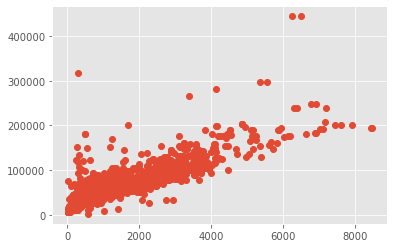

In [303]:
data_2 = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
X = data['선적 작업 수량']+data['양하 작업 수량']
Y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
print(X)
print(Y)
plt.plot(X,Y,linestyle='none',marker='o')
plt.show()

In [ ]:
terminal_schedule_1_2 = terminal_schedule_1_2[terminal_schedule_1_2['선적 작업 수량']  terminal_schedule_1_2['양하 작업 수량']]